# Tips

### 1. Problem Understanding and Definition

**Analyze people based on categories who are most likely to spend money for cigarettes**
- What is the relationship between people who smoked and spent money?
- What is solution to increase income?

### 2. Data Processing

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
tips= sns.load_dataset('tips')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 3. Data understanding using Exploratory Data Analysis (EDA) and Analyze Insight

In [38]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [41]:
tips.groupby('time')['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

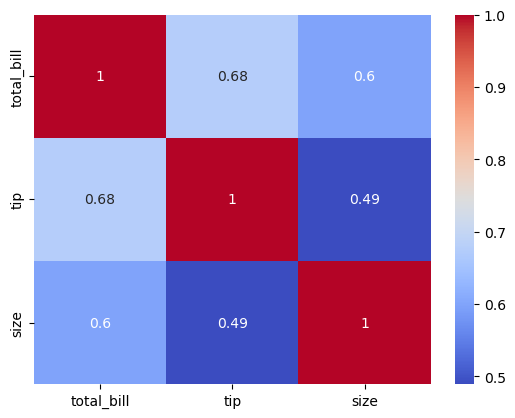

In [42]:
df=tips.corr()
sns.heatmap(df, annot= True, cmap='coolwarm');

- total bill has pretty high correlation with tip and size
- Then tip with size 

In [47]:
tips.groupby(['smoker', 'sex'])['tip'].mean().unstack().reset_index()

sex,smoker,Male,Female
0,Yes,3.051167,2.931515
1,No,3.113402,2.773519


In [98]:

#sns.relplot(x='total_bill', y='tip', data= tips, col='sex', hue='time');

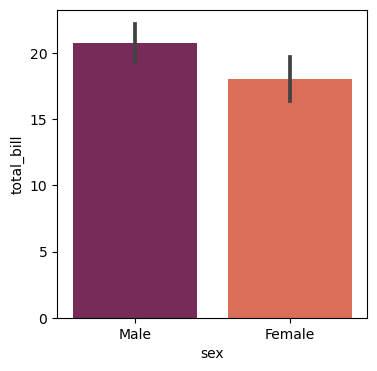

In [73]:
import warnings
warnings.simplefilter("ignore") 
plt.subplots(figsize= (4,4))
ax= sns.barplot(x='sex',y='total_bill',data=tips,palette= 'rocket');

- Men spent more money than Women

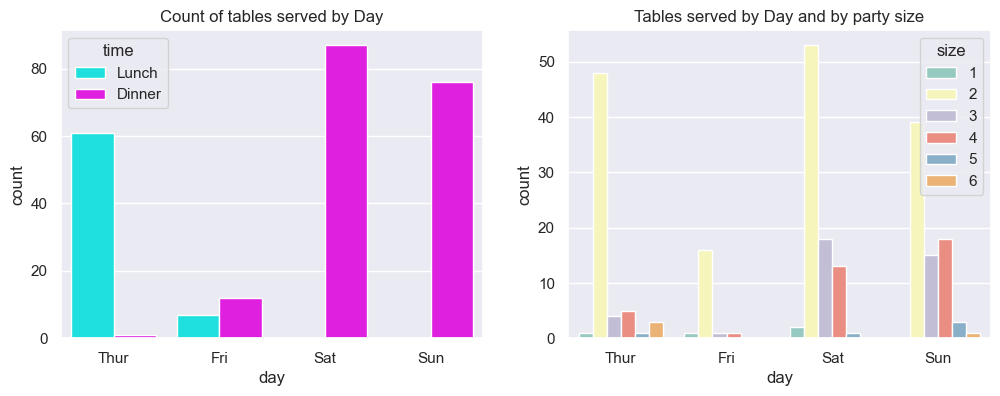

In [111]:
sns.set( palette="Set3")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
day1=["Thur", "Fri", "Sat","Sun"]

sns.countplot(x ="day",data =tips, hue="time", palette=["aqua","magenta"], order=day_order, ax=axes[0])
axes[0].set_title("Count of tables served by Day")

sns.countplot(x =("day"), hue="size",data =tips, ax=axes[1], order=day1)
axes[1].set_title("Tables served by Day and by party size");

 >- Fridays are the deserted days for waiters. Saturdays are the busiest days followed by Sundays so there are more customers at the weekend.
 >- The most common party size so far is 2. few lone diners at 1, 5, and 6 parties

In [158]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

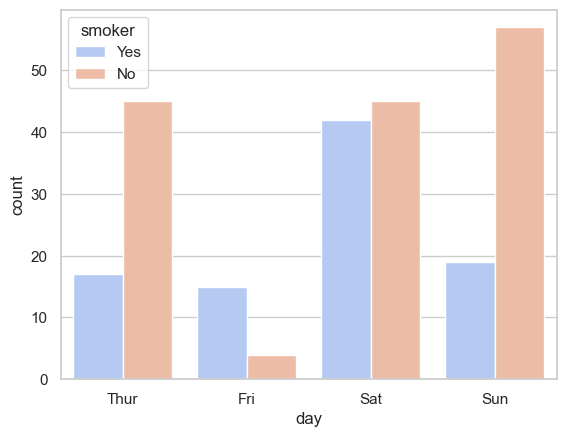

In [164]:
sns.set(style="whitegrid")
sns.countplot(x="day", hue="smoker",data=tips, palette='coolwarm');

- *max tip is gained in Saturday(weekend)*
- *More non-smokers than smokers on any day but especially on Thursdays and Sundays. For Fridays, these customers are mostly smokers. It indicates the reason, Friday has less customers than any day.*

In [130]:
tips['Bill/person']= tips['total_bill']/tips['size']
tips['tip/person']=tips['tip']/tips['size']
tips['total_all']=tips['total_bill']+tips['tip']

- $Std$ of total bill is $8.9$ also mean of bill/person is $7.9$. it close to the reason way.

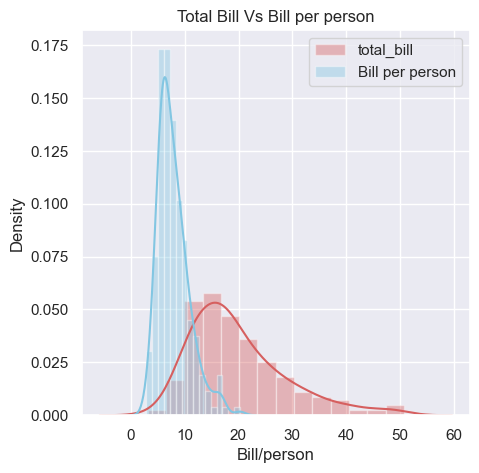

In [152]:
%matplotlib inline
plt.subplots(figsize=(5,5))
sns.distplot(tips['total_bill'], color="r", label="total_bill")
sns.distplot(tips['Bill/person'], color="c", label="Bill per person")
plt.title("Total Bill Vs Bill per person")
plt.legend();


- This shows that most bill per person fall in the range between 3 and 20 dollars

### 4. Conclusion

***Note***: 
- Restaurant owners should provide more special places for those who smoke and don't. as well as giving special discount on Friday.
- To increase the number of tips for each person, each waiter is required to provide good service, provide the right menu and time.